# Customer Satisfaction Analysis
---
---


 


## Importing the modules

In [1]:
import pandas as pd 
import string 

# Importing Natural Language Processing toolkit 
import nltk

# Downloading the NLTK english stop words
nltk.download('stopwords')

# Downloading the NLTK sentence tokenizer

nltk.download('punkt_tab')

# Downloading the NLTK POS Tagger

nltk.download('averaged_perceptron_tagger_eng')

# Downloading the NLTK Vader Lexicon
nltk.download('vader_lexicon')

# Importing the NLTK english stop words 
from nltk.corpus import stopwords

# Importing frequency distribution from NLTK
from nltk.probability import FreqDist

# Importing VADER dictionary. It is a rule-based sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer

# Importing data visualization modules 
from wordcloud import WordCloud
import plotly.express as px 
import matplotlib.pyplot as plt

print("Modules are imported! :)")

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Modules are imported! :)



### Loading the customer reviews dataset
---

In [2]:
data=pd.read_csv('dataset.csv')
data.head()

product_review product_category
0  I love, love, love this jumpsuit. it's fun, fl...          Bottoms
1  Beautifully made pants and on trend with the f...          Bottoms
2  I never would have given these pants a second ...          Bottoms
3  These pants are even better in person. the onl...          Bottoms
4  The silhouette and length of this skirt and le...          Bottoms

Let's check the shape of the data frame

In [3]:
data.shape

(3376, 2)

Let's check the first `product_review`

In [4]:
data.product_review[0]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

### Checking the number of reviews per product category

In [5]:
data.product_category.value_counts()

product_category
Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: count, dtype: int64

## Clean and preprocess the reviews

- Lower casing
- Removing the punctuations

---

In [6]:
data.head()

product_review product_category
0  I love, love, love this jumpsuit. it's fun, fl...          Bottoms
1  Beautifully made pants and on trend with the f...          Bottoms
2  I never would have given these pants a second ...          Bottoms
3  These pants are even better in person. the onl...          Bottoms
4  The silhouette and length of this skirt and le...          Bottoms

## Converting all the reveiews to lower case

In [7]:
review=data.product_review[0]
review.lower()

"i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [8]:
data.product_review=data.product_review.str.lower()
data.head()

product_review product_category
0  i love, love, love this jumpsuit. it's fun, fl...          Bottoms
1  beautifully made pants and on trend with the f...          Bottoms
2  i never would have given these pants a second ...          Bottoms
3  these pants are even better in person. the onl...          Bottoms
4  the silhouette and length of this skirt and le...          Bottoms

## Removing the punctuations

In [9]:
data.product_review[0].translate(str.maketrans('i','o','v'))

"o loe, loe, loe thos jumpsuot. ot's fun, florty, and fabulous! eery tome o wear ot, o get nothong but great comploments!"

In [10]:
data.product_review[0].translate(str.maketrans('','',string.punctuation))

'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'

## Let's remove the punctuations from all the reviews

In [11]:
data.product_review.str.translate(str.maketrans('','',string.punctuation))

0       i love love love this jumpsuit its fun flirty ...
1       beautifully made pants and on trend with the f...
2       i never would have given these pants a second ...
3       these pants are even better in person the only...
4       the silhouette and length of this skirt and le...
                              ...                        
3371    this is a nice everyday jacket to wear with dr...
3372    almost perfect this jacket doesnt have that we...
3373    i really like the soft and very wearability of...
3374    i need to remember that this brand runs small ...
3375    i had my eye on this coat for so long when i s...
Name: product_review, Length: 3376, dtype: object

In [12]:
data.product_review=data.product_review.str.translate(str.maketrans('','',string.punctuation))
data.head()

product_review product_category
0  i love love love this jumpsuit its fun flirty ...          Bottoms
1  beautifully made pants and on trend with the f...          Bottoms
2  i never would have given these pants a second ...          Bottoms
3  these pants are even better in person the only...          Bottoms
4  the silhouette and length of this skirt and le...          Bottoms

## Tokenize the reviews and removing the stop words 
---
- <b>Tokenization</b> is the process of breaking down a continuous stream of text, such as a sentence or a paragraph, into smaller units called tokens. These tokens typically correspond to words, but can also represent subword units like prefixes, suffixes, and stems.

- <b>Tokenization</b> facilitates the transformation of text into a format that machine learning algorithms can understand.

In [13]:
nltk.word_tokenize("i love you")

['i', 'love', 'you']

In [14]:
tokens=nltk.word_tokenize(data.product_review[0])
tokens

['i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'flirty',
 'and',
 'fabulous',
 'every',
 'time',
 'i',
 'wear',
 'it',
 'i',
 'get',
 'nothing',
 'but',
 'great',
 'compliments']

## remove the Stop Words
    
<b>Stop words</b> are common words (e.g., "the," "and," "is") that appear frequently in a language and have little semantic value. Removing them is essential in natural language processing tasks to reduce data size, speed up processing, and improve the accuracy of algorithms by focusing on more informative words that convey the actual meaning of a text.


In [15]:
english_stopwords=stopwords.words("english")
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Let's remove the stop words from the `tokens` list

In [16]:
[t for t in tokens if t not in english_stopwords]

['love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliments']

## tokenize all the reviews 

In [17]:
data["product_review_tokenized"]=data.product_review.apply(nltk.word_tokenize)
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  
0  [i, love, love, love, this, jumpsuit, its, fun...  
1  [beautifully, made, pants, and, on, trend, wit...  
2  [i, never, would, have, given, these, pants, a...  
3  [these, pants, are, even, better, in, person, ...  
4  [the, silhouette, and, length, of, this, skirt...

## remove the stopwords from the tokenized reviews

In [18]:
def remove_stopwords(tokens):
    return [t for t in tokens if t not in english_stopwords]
    
data["cleaned_tokens"]=data.product_review_tokenized.apply(remove_stopwords)
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                      cleaned_tokens  
0  [love, love, love, jumpsuit, fun, flirty, fabu...  
1  [beautifully, made, pants, trend, flared, crop...  
2  [never, would, given, pants, second, look, onl...  
3  [pants, even, better, person, downside, need, ...  
4  [silhouette, length, skirt, length, flattering...

## recreate the reviews from the cleaned tokens again

In [19]:
data.cleaned_tokens[0]

['love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliments']

In [20]:
tokens=data.cleaned_tokens[0]
" ".join(tokens)

'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments'

In [21]:
data["product_review_cleaned"]=data.cleaned_tokens.apply(lambda x: " ".join(x))
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                      cleaned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  
0  love love love jumpsuit fun flirty fabulous ev...  
1  beautifully made pants trend flared crop much ...  
2  never would given pants second look online per...  
3  pants even better person downside need dry cle...  
4  silhouette length skirt length flattering clas...

## Exploring the tokens and product categories

In [22]:
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                      cleaned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  
0  love love love jumpsuit fun flirty fabulous ev...  
1  beautifully made pants trend flared crop much ...  
2  never would given pants second look online per...  
3  pants even better person downside need dry cle...  
4  silhouette length skirt length flattering clas...

Let's take a look at the product categories again

In [23]:
data.product_category.value_counts()

product_category
Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: count, dtype: int64

## combine all the tokens used in reviews for the `Tops`

In [24]:
data[data.product_category == "Tops"]


product_review product_category  \
2016  this shirt is very flattering to all due to th...             Tops   
2017  i aded this in my basket at hte last mintue to...             Tops   
2018  took a chance on this blouse and so glad i did...             Tops   
2019  i love this shirt because when i first saw it ...             Tops   
2020  this sweater is so comfy and classic  it balan...             Tops   
...                                                 ...              ...   
2691  super cute will be buying another color of thi...             Tops   
2692  nice top that can be worn alone or underneath ...             Tops   
2693  i debated between the xs and the smalland ende...             Tops   
2694  i love this top i was thinking that i was goin...             Tops   
2695  this shirt is awesome i absolutely love the st...             Tops   

                               product_review_tokenized  \
2016  [this, shirt, is, very, flattering, to, all, d...   
2017  [i, aded, this, in, my, basket, at, hte, last,...   
2018  [took, a, chance, on, this, blouse, and, so, g...   
2019  [i, love, this, shirt, because, when, i, first...   
2020  [this, sweater, is, so, comfy, and, classic, i...   
...                                                 ...   
2691  [super, cute, will, be, buying, another, color...   
2692  [nice, top, that, can, be, worn, alone, or, un...   
2693  [i, debated, between, the, xs, and, the, small...   
2694  [i, love, this, top, i, was, thinking, that, i...   
2695  [this, shirt, is, awesome, i, absolutely, love...   

                                         cleaned_tokens  \
2016  [shirt, flattering, due, adjustable, front, ti...   
2017  [aded, basket, hte, last, mintue, see, would, ...   
2018  [took, chance, blouse, glad, wasnt, crazy, blo...   
2019  [love, shirt, first, saw, wasnt, sure, shirt, ...   
2020  [sweater, comfy, classic, balances, quirky, ha...   
...                                                 ...   
2691         [super, cute, buying, another, color, tee]   
2692  [nice, top, worn, alone, underneath, sweater, ...   
2693  [debated, xs, smalland, ended, small, 100, cot...   
2694  [love, top, thinking, going, need, xlarge, im,...   
2695  [shirt, awesome, absolutely, love, style, shir...   

                                 product_review_cleaned  
2016  shirt flattering due adjustable front tie perf...  
2017  aded basket hte last mintue see would look lik...  
2018  took chance blouse glad wasnt crazy blouse pho...  
2019  love shirt first saw wasnt sure shirt dress si...  
2020  sweater comfy classic balances quirky handknit...  
...                                                 ...  
2691                super cute buying another color tee  
2692  nice top worn alone underneath sweater dressed...  
2693  debated xs smalland ended small 100 cotton pro...  
2694  love top thinking going need xlarge im busty t...  
2695  shirt awesome absolutely love style shirt supe...  

[680 rows x 5 columns]

In [25]:
data[data.product_category == "Tops"].cleaned_tokens

2016    [shirt, flattering, due, adjustable, front, ti...
2017    [aded, basket, hte, last, mintue, see, would, ...
2018    [took, chance, blouse, glad, wasnt, crazy, blo...
2019    [love, shirt, first, saw, wasnt, sure, shirt, ...
2020    [sweater, comfy, classic, balances, quirky, ha...
                              ...                        
2691           [super, cute, buying, another, color, tee]
2692    [nice, top, worn, alone, underneath, sweater, ...
2693    [debated, xs, smalland, ended, small, 100, cot...
2694    [love, top, thinking, going, need, xlarge, im,...
2695    [shirt, awesome, absolutely, love, style, shir...
Name: cleaned_tokens, Length: 680, dtype: object

In [26]:
tops_tokens=[]
for x in data[data.product_category == "Tops"].cleaned_tokens:
    tops_tokens.extend(x)

tops_tokens

['shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'leggings',
 'sleeveless',
 'pairs',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turns',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'xs',
 'hte',
 'msallet',
 'size',
 'bummer',
 'petite',
 'decided',
 'jkeep',
 'though',
 'said',
 'matvehd',
 'everything',
 'ejans',
 'pants',
 '3',
 'skirts',
 'waas',
 'trying',
 'kept',
 'oops',
 'took',
 'chance',
 'blouse',
 'glad',
 'wasnt',
 'crazy',
 'blouse',
 'photographed',
 'model',
 'paired',
 'whit',
 'white',
 'pants',
 'worked',
 'perfectly',
 'crisp',
 'clean',
 'would',
 'describe',
 'launders',
 'well',
 'fits',
 'great',
 'drape',
 'perfect',
 'wear',
 'tucked',
 'cant',
 'go',
 'wrong',
 'love',
 

In [27]:
len(tops_tokens)

18527

Let's find the 20 most common words in the `Tops` products' reviews 

In [28]:
freq_dist=FreqDist(tops_tokens)
freq_dist.most_common(20)

[('love', 337),
 ('top', 334),
 ('wear', 233),
 ('great', 229),
 ('size', 211),
 ('color', 185),
 ('shirt', 172),
 ('fit', 167),
 ('im', 149),
 ('perfect', 146),
 ('small', 141),
 ('like', 140),
 ('soft', 136),
 ('flattering', 128),
 ('little', 120),
 ('one', 119),
 ('sweater', 118),
 ('fits', 112),
 ('bought', 111),
 ('well', 109)]

the 20 most common words in the `Dresses` products' reviews 

In [29]:
dresses_tokens=[]
for x in data[data.product_category == "Dresses"].cleaned_tokens:
    dresses_tokens.extend(x)

freq_dist=FreqDist(dresses_tokens)
freq_dist.most_common(20)

[('dress', 1062),
 ('like', 321),
 ('fabric', 254),
 ('would', 220),
 ('size', 207),
 ('fit', 207),
 ('back', 166),
 ('look', 157),
 ('really', 154),
 ('love', 152),
 ('im', 146),
 ('ordered', 146),
 ('material', 139),
 ('small', 128),
 ('looks', 119),
 ('looked', 118),
 ('much', 111),
 ('also', 106),
 ('top', 105),
 ('wear', 105)]

## Extracting the adjectives used in the reviews

In [30]:
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                      cleaned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  
0  love love love jumpsuit fun flirty fabulous ev...  
1  beautifully made pants trend flared crop much ...  
2  never would given pants second look online per...  
3  pants even better person downside need dry cle...  
4  silhouette length skirt length flattering clas...

### Part of Speech Tagging


<b>Part of Speech:</b> The grammatical role of a word in a sentence. A part of speech is one of the nine types of English words: VERB, NOUN, ADJECTIVE, ADVERB, PRONOUN, PREPOSITION, DETERMINER, CONJUNCTION, INTERJECTION.

In [31]:
nltk.download('tagsets_json')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Error loading tagsets_json: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [32]:

nltk.pos_tag(data.product_review_tokenized[0])


[('i', 'NN'),
 ('love', 'VBP'),
 ('love', 'NN'),
 ('love', 'NN'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('its', 'PRP$'),
 ('fun', 'NN'),
 ('flirty', 'NN'),
 ('and', 'CC'),
 ('fabulous', 'JJ'),
 ('every', 'DT'),
 ('time', 'NN'),
 ('i', 'NN'),
 ('wear', 'VBP'),
 ('it', 'PRP'),
 ('i', 'JJ'),
 ('get', 'VBP'),
 ('nothing', 'NN'),
 ('but', 'CC'),
 ('great', 'JJ'),
 ('compliments', 'NNS')]

## POS-tagger to assign part of speech to all the tokens of all of the reviews

In [33]:
data['POS_tokens']=data.product_review_tokenized.apply(nltk.pos_tag)
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                      cleaned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  \
0  love love love jumpsuit fun flirty fabulous ev...   
1  beautifully made pants trend flared crop much ...   
2  never would given pants second look online per...   
3  pants even better person downside need dry cle...   
4  silhouette length skirt length flattering clas...   

                                          POS_tokens  
0  [(i, NN), (love, VBP), (love, NN), (love, NN),...  
1  [(beautifully, RB), (made, VBN), (pants, NNS),...  
2  [(i, NN), (never, RB), (would, MD), (have, VB)...  
3  [(these, DT), (pants, NNS), (are, VBP), (even,...  
4  [(the, DT), (silhouette, NN), (and, CC), (leng...

## extract the adjectives used in each review

In [34]:
def extract_adj(tokens):
    adjectives=[]
    for x in tokens:
        if x[1] in ['JJ','JJS','JJR']:
            adjectives.append(x[0])
    return adjectives

data['adjectives']=data.POS_tokens.apply(extract_adj)
data.head()
        


product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                      cleaned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  \
0  love love love jumpsuit fun flirty fabulous ev...   
1  beautifully made pants trend flared crop much ...   
2  never would given pants second look online per...   
3  pants even better person downside need dry cle...   
4  silhouette length skirt length flattering clas...   

                                          POS_tokens  \
0  [(i, NN), (love, VBP), (love, NN), (love, NN),...   
1  [(beautifully, RB), (made, VBN), (pants, NNS),...   
2  [(i, NN), (never, RB), (would, MD), (have, VB)...   
3  [(these, DT), (pants, NNS), (are, VBP), (even,...   
4  [(the, DT), (silhouette, NN), (and, CC), (leng...   

                                          adjectives  
0                               [fabulous, i, great]  
1                                     [flared, much]  
2   [second, much, cuter, right, small, loose, navy]  
3                                        [only, dry]  
4  [classic, comfortable, favorite, different, hi...

Let's combine all the `adjectives` for the `Tops`.

In [35]:
data[data.product_category== 'Tops'].adjectives

2016     [flattering, due, adjustable, perfect, cardigan]
2017     [last, i, pale, gorgeous, little, hte, ejans, i]
2018    [glad, i, white, crisp, clean, i, great, perfe...
2019        [wasnt, seethrough, white, careful, i, great]
2020    [comfy, classic, quirky, beautiful, practical,...
                              ...                        
2691                                              [super]
2692                                         [nice, worn]
2693    [small, i, little, little, more, consistent, f...
2694    [top, im, busty, large, perfect, comfortable, ...
2695    [awesome, super, breathable, fabric, printed, ...
Name: adjectives, Length: 680, dtype: object

In [36]:
adj_tops=""
for x in data[data.product_category== 'Tops'].adjectives:
    adj_tops +=" ".join(x) + " "

adj_tops

'flattering due adjustable perfect cardigan last i pale gorgeous little hte ejans i glad i white crisp clean i great perfect wear cant wrong wasnt seethrough white careful i great comfy classic quirky beautiful practical cropped boxy perfect longer camisole little thin small gorgeous unsnapped skinny true great casual flare grey back nice beautiful ordinary usual tight chest i cute plaid great local comfortable bad little dressier small black top comfortable comfortable good perfect roomy warm cute collar beautiful unique busty top small wouldve fit better adorable bib favorite small perfect soft comfortable unusual asymmetrical front visual little ive adorable i comfortable feminine great dark perfect wish happy comfortable flattering comfortable light top lovely floral great white top happy top online little i little large petite longer regular perfect give soft comfortable short much uncomfortable doesnt easier navy boxy whole cute more fabric i super read same specific petite weigh

## visualize the adjectives using a wordcloud

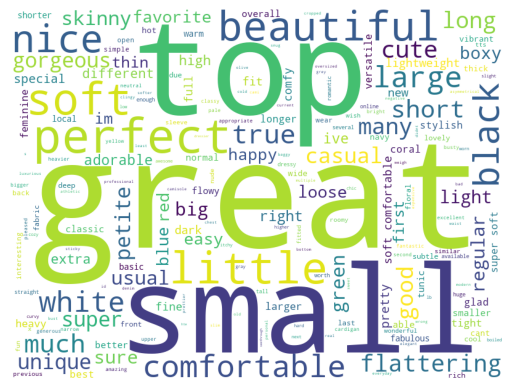

In [37]:
word_cloud= WordCloud(width=800,height=600,background_color='white').generate(adj_tops)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()



### gets a product category name and combine the adjectives used in the reviews related to the input category and visualize them using a word cloud.

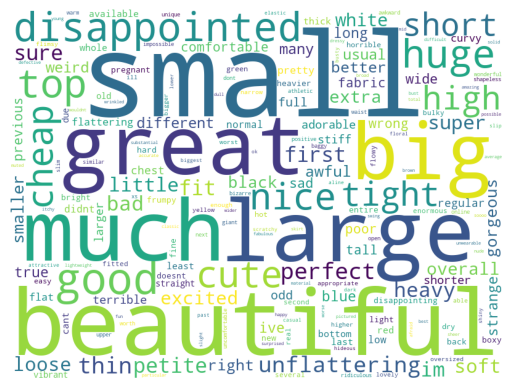

In [38]:
def visualize_adjectives(category):
    adjectives=" "
    
    for x in data[data.product_category== category].adjectives:
        adjectives +=" ".join(x) + " "
        
        
    word_cloud= WordCloud(width=800,height=600,background_color='white').generate(adjectives)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

visualize_adjectives("Dresses")
    




## Finding the sentiment of each review 

In [39]:
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                      cleaned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  \
0  love love love jumpsuit fun flirty fabulous ev...   
1  beautifully made pants trend flared crop much ...   
2  never would given pants second look online per...   
3  pants even better person downside need dry cle...   
4  silhouette length skirt length flattering clas...   

                                          POS_tokens  \
0  [(i, NN), (love, VBP), (love, NN), (love, NN),...   
1  [(beautifully, RB), (made, VBN), (pants, NNS),...   
2  [(i, NN), (never, RB), (would, MD), (have, VB)...   
3  [(these, DT), (pants, NNS), (are, VBP), (even,...   
4  [(the, DT), (silhouette, NN), (and, CC), (leng...   

                                          adjectives  
0                               [fabulous, i, great]  
1                                     [flared, much]  
2   [second, much, cuter, right, small, loose, navy]  
3                                        [only, dry]  
4  [classic, comfortable, favorite, different, hi...

Let's find the sentiment of the reviews

In [40]:
sent=SentimentIntensityAnalyzer()
review=data.product_review_cleaned[0]
print(review)

scores=sent.polarity_scores(review)
print(scores)

love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments
{'neg': 0.171, 'neu': 0.185, 'pos': 0.644, 'compound': 0.9464}


## Sentiment scores:

- `pos`: The probability of `positive` sentiment
- `neu`: The probability of `neutral` sentiment
- `neg`: The probability of `negative` sentiment
- `compound`: The normalized `compound` score that takes values from -1 to 1

We can use the `compound` score to find the sentiment of each review.

- if compound score>=0.05 then `positive` 
- if compound score between -0.05 and 0.05 then `neutral` 
- if compound score<=-0.05 then `negative` 


## create a method to find the sentiment of a review using the compound score

In [41]:
def polarity_score(review):
    # Initilizing the Sentiment Analyzer
    sent = SentimentIntensityAnalyzer()
   
    # Extracting the sentiment polarity scores of a review
    scores = sent.polarity_scores(review)
    
    # Getting the compound score
    compound = scores['compound']
    
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    else:
        return "neutral"

polarity_score("this product is bad")

'negative'

## label all the reviews with sentiment

In [42]:
data["sentiment"]=data.product_review_cleaned.apply(polarity_score)
data.head()

product_review product_category  \
0  i love love love this jumpsuit its fun flirty ...          Bottoms   
1  beautifully made pants and on trend with the f...          Bottoms   
2  i never would have given these pants a second ...          Bottoms   
3  these pants are even better in person the only...          Bottoms   
4  the silhouette and length of this skirt and le...          Bottoms   

                            product_review_tokenized  \
0  [i, love, love, love, this, jumpsuit, its, fun...   
1  [beautifully, made, pants, and, on, trend, wit...   
2  [i, never, would, have, given, these, pants, a...   
3  [these, pants, are, even, better, in, person, ...   
4  [the, silhouette, and, length, of, this, skirt...   

                                      cleaned_tokens  \
0  [love, love, love, jumpsuit, fun, flirty, fabu...   
1  [beautifully, made, pants, trend, flared, crop...   
2  [never, would, given, pants, second, look, onl...   
3  [pants, even, better, person, downside, need, ...   
4  [silhouette, length, skirt, length, flattering...   

                              product_review_cleaned  \
0  love love love jumpsuit fun flirty fabulous ev...   
1  beautifully made pants trend flared crop much ...   
2  never would given pants second look online per...   
3  pants even better person downside need dry cle...   
4  silhouette length skirt length flattering clas...   

                                          POS_tokens  \
0  [(i, NN), (love, VBP), (love, NN), (love, NN),...   
1  [(beautifully, RB), (made, VBN), (pants, NNS),...   
2  [(i, NN), (never, RB), (would, MD), (have, VB)...   
3  [(these, DT), (pants, NNS), (are, VBP), (even,...   
4  [(the, DT), (silhouette, NN), (and, CC), (leng...   

                                          adjectives sentiment  
0                               [fabulous, i, great]  positive  
1                                     [flared, much]  positive  
2   [second, much, cuter, right, small, loose, navy]  positive  
3                                        [only, dry]  positive  
4  [classic, comfortable, favorite, different, hi...  positive

## visualize

In [43]:
df=data.groupby(["product_category","sentiment"]).size().reset_index(name="count")
df

product_category sentiment  count
0           Bottoms  negative      3
1           Bottoms   neutral      5
2           Bottoms  positive    677
3           Dresses  negative     36
4           Dresses   neutral     82
5           Dresses  positive    563
6          Intimate  negative      5
7          Intimate   neutral     35
8          Intimate  positive    610
9           Jackets  negative      2
10          Jackets   neutral      9
11          Jackets  positive    669
12             Tops  negative      1
13             Tops   neutral      5
14             Tops  positive    674

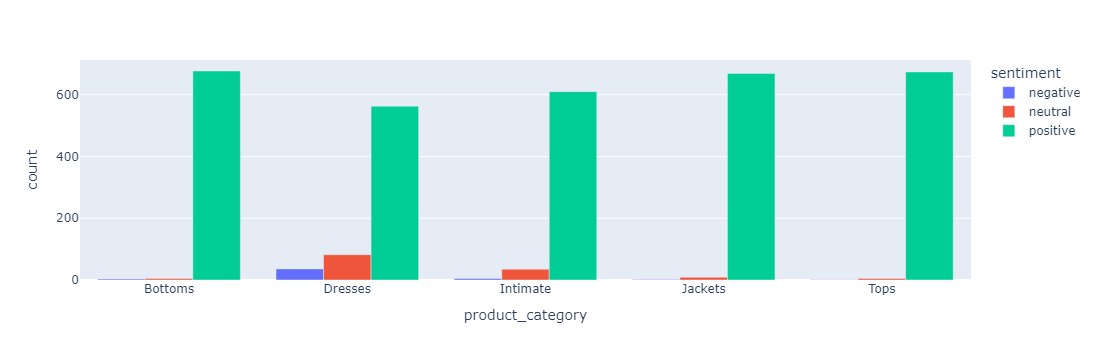

In [44]:
px.bar(df,x="product_category",y="count",color="sentiment",barmode="group")

# End